In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats

In [19]:
# Load the data
df = pd.read_csv('Heart.csv')

In [20]:
# Basic information about the dataset
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB
None

Missing values:
 Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0

In [21]:
# Data Preprocessing
# Handle missing values
df['Ca'].fillna(df['Ca'].median(), inplace=True)
df['Thal'].fillna(df['Thal'].mode()[0], inplace=True)

In [22]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [24]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

In [25]:
# Basic statistics
print("\nBasic statistics of numerical columns:")
print(numeric_df.describe())


Basic statistics of numerical columns:
       Unnamed: 0         Age         Sex      RestBP        Chol         Fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean   152.000000   54.438944    0.679868  131.689769  246.693069    0.148515   
std     87.612784    9.038662    0.467299   17.599748   51.776918    0.356198   
min      1.000000   29.000000    0.000000   94.000000  126.000000    0.000000   
25%     76.500000   48.000000    0.000000  120.000000  211.000000    0.000000   
50%    152.000000   56.000000    1.000000  130.000000  241.000000    0.000000   
75%    227.500000   61.000000    1.000000  140.000000  275.000000    0.000000   
max    303.000000   77.000000    1.000000  200.000000  564.000000    1.000000   

          RestECG       MaxHR       ExAng     Oldpeak       Slope          Ca  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0

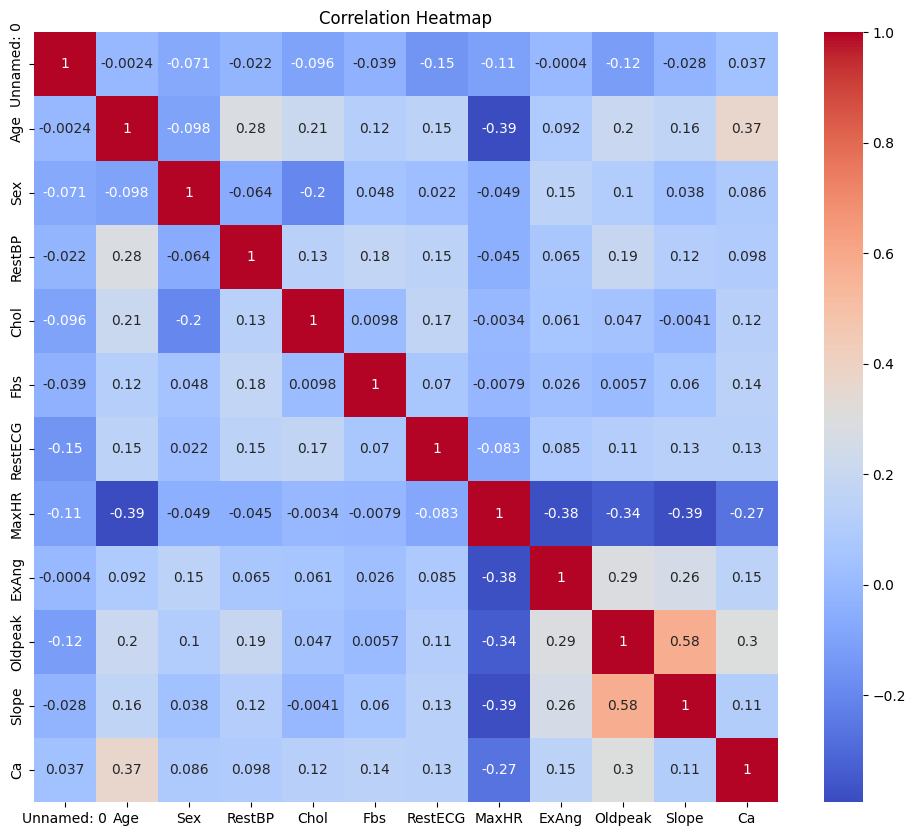

In [26]:
# Advanced EDA

# 1. Correlation Heatmap
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

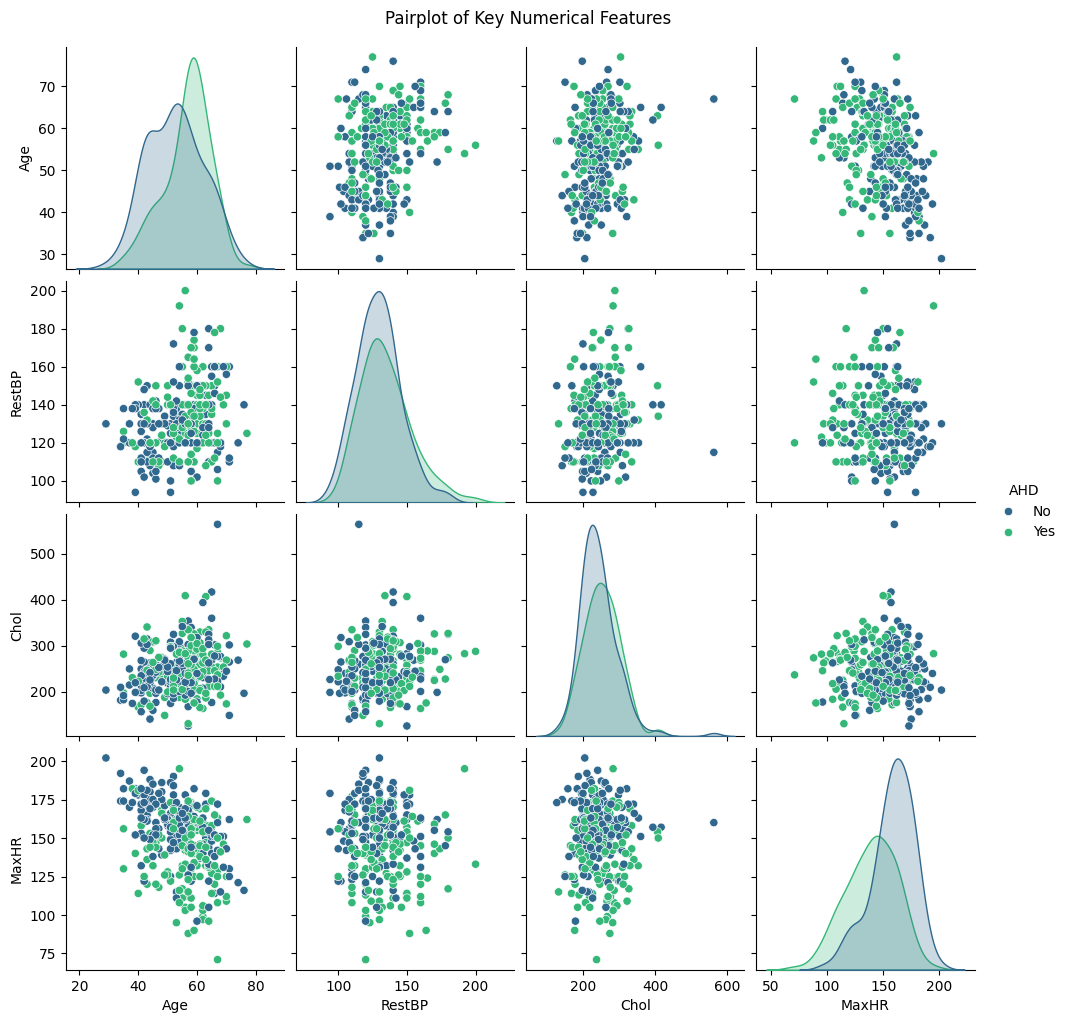

In [27]:
# 2. Pairplot for key numerical features
sns.pairplot(df[['Age', 'RestBP', 'Chol', 'MaxHR', 'AHD']], hue='AHD', palette='viridis')
plt.suptitle('Pairplot of Key Numerical Features', y=1.02)
plt.show()

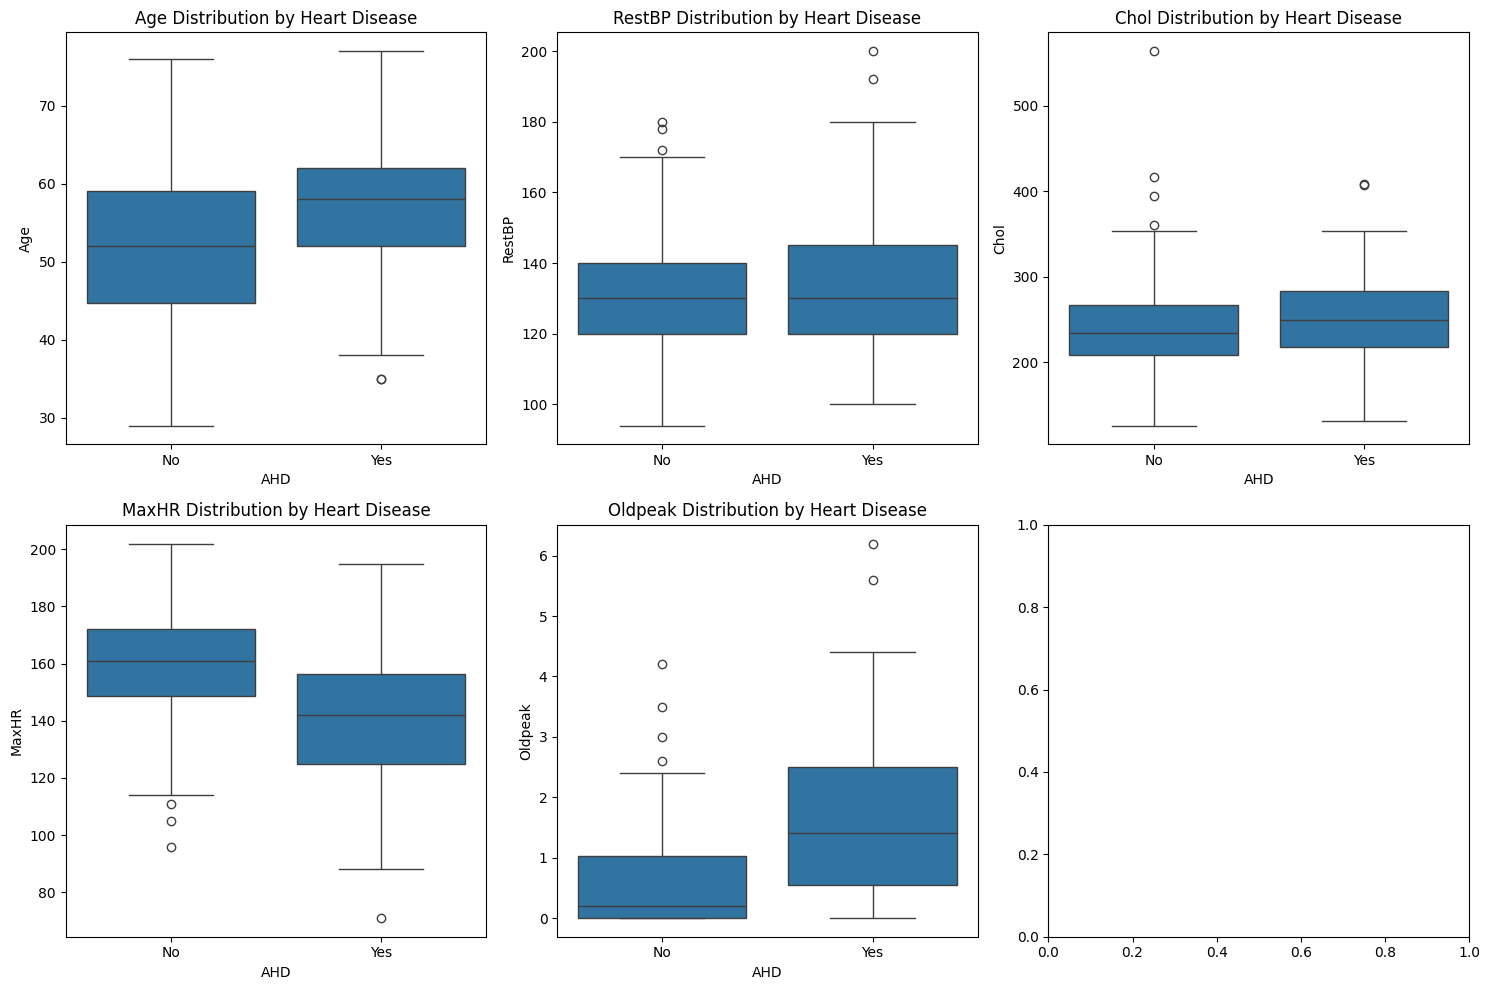

In [28]:
# 3. Box and Whisker plots for numerical features
numerical_features = ['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(x='AHD', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'{feature} Distribution by Heart Disease')

plt.tight_layout()
plt.show()

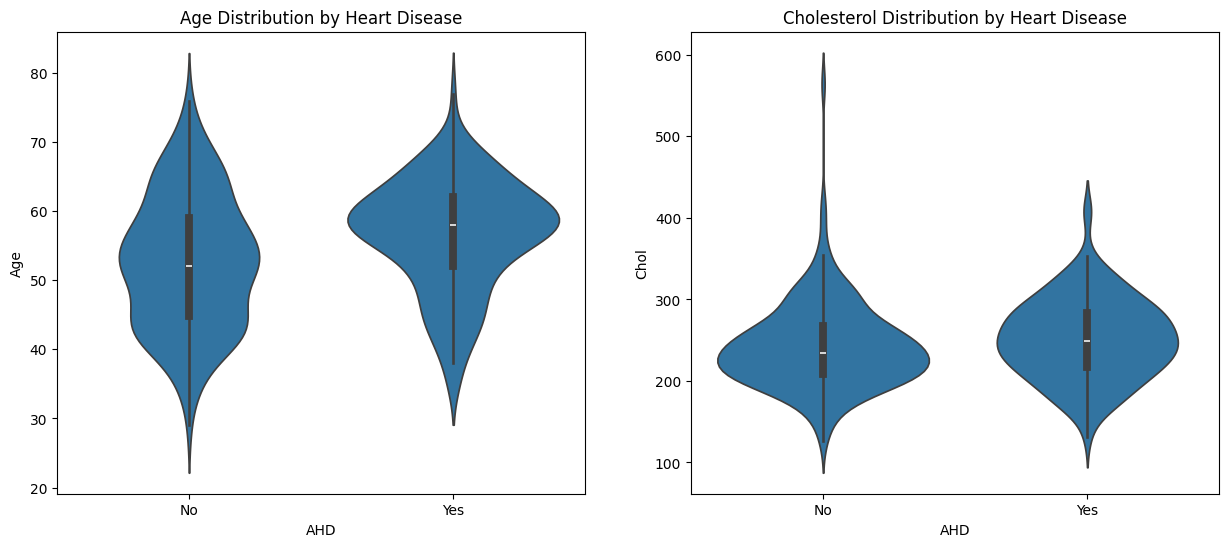

In [29]:
# 4. Violin plots for Age and Cholesterol
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sns.violinplot(x='AHD', y='Age', data=df, ax=ax1)
ax1.set_title('Age Distribution by Heart Disease')
sns.violinplot(x='AHD', y='Chol', data=df, ax=ax2)
ax2.set_title('Cholesterol Distribution by Heart Disease')
plt.show()

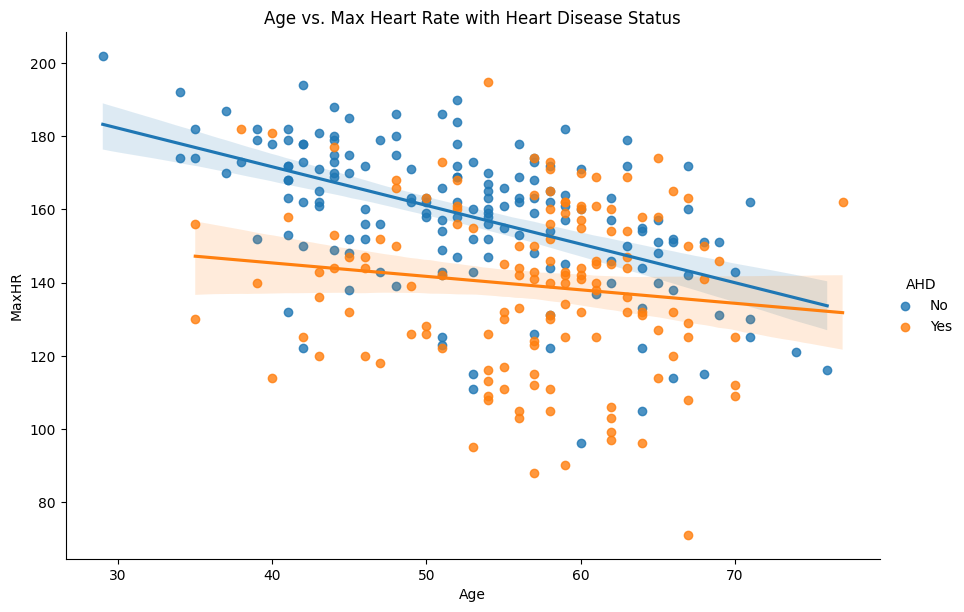

In [30]:
# 5. Regression plot (Age vs. MaxHR)
sns.lmplot(x='Age', y='MaxHR', hue='AHD', data=df, height=6, aspect=1.5)
plt.title('Age vs. Max Heart Rate with Heart Disease Status')
plt.show()

In [31]:
# 6. 3D Scatter plot (Age, Chol, MaxHR)
fig = px.scatter_3d(df, x='Age', y='Chol', z='MaxHR', color='AHD',
                    title='3D Scatter Plot: Age, Cholesterol, and Max Heart Rate')
fig.show()

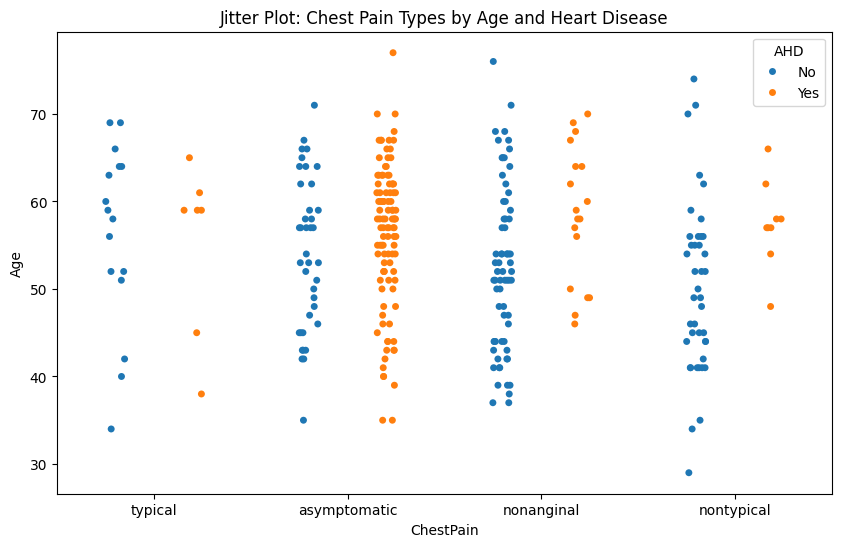

In [32]:
# 7. Jitter plot for Chest Pain Types
plt.figure(figsize=(10, 6))
sns.stripplot(x='ChestPain', y='Age', hue='AHD', data=df, jitter=True, dodge=True)
plt.title('Jitter Plot: Chest Pain Types by Age and Heart Disease')
plt.show()

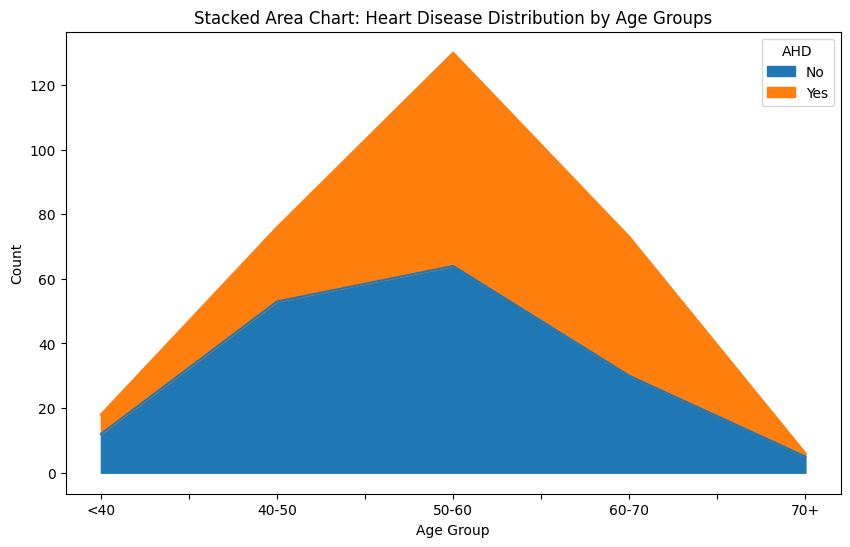

In [33]:
# 8. Stacked Area Chart for Age Groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 40, 50, 60, 70, 100], labels=['<40', '40-50', '50-60', '60-70', '70+'])
age_group_counts = df.groupby(['AgeGroup', 'AHD']).size().unstack()
age_group_counts.plot(kind='area', stacked=True, figsize=(10, 6))
plt.title('Stacked Area Chart: Heart Disease Distribution by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [34]:
# 9. Treemap for Chest Pain Types and Heart Disease
fig = px.treemap(df, path=['ChestPain', 'AHD'], values='Age',
                 title='Treemap: Chest Pain Types and Heart Disease')
fig.show()

In [35]:
# 10. Funnel Chart for Diagnosis Steps
diagnosis_steps = ['Initial Checkup', 'ECG', 'Blood Test', 'Stress Test', 'Angiography', 'Diagnosis']
values = [300, 280, 250, 200, 150, 100]
fig = go.Figure(go.Funnel(y=diagnosis_steps, x=values))
fig.update_layout(title='Funnel Chart: Heart Disease Diagnosis Process')
fig.show()

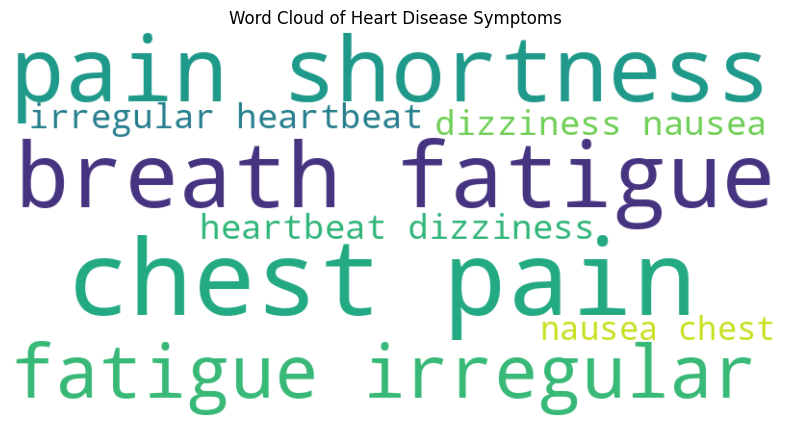

In [36]:
# 11. Word Cloud of Symptoms (using predefined symptoms for illustration)
from wordcloud import WordCloud

symptoms = "chest pain shortness of breath fatigue irregular heartbeat dizziness nausea " * 10
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(symptoms)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Heart Disease Symptoms')
plt.show()

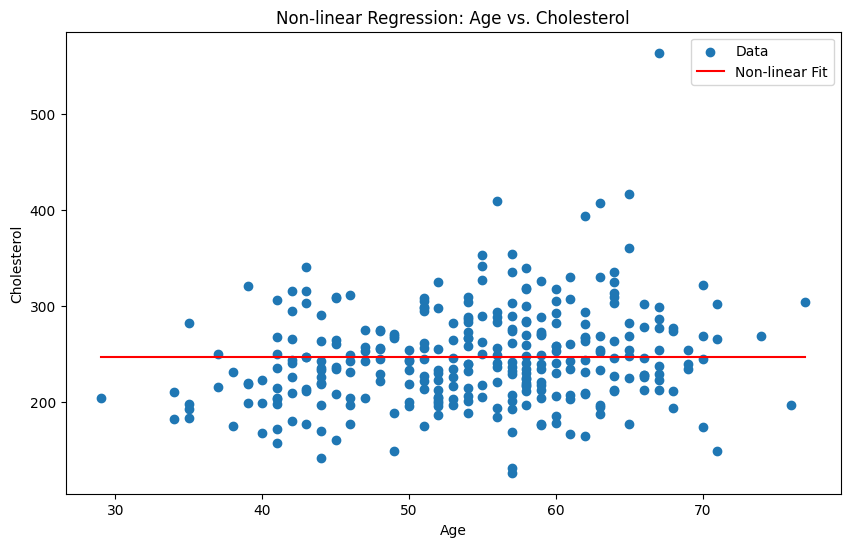

In [37]:
# 12. Non-linear Regression (Age vs. Cholesterol)
from scipy.optimize import curve_fit

def nonlinear_func(x, a, b, c):
    return a * np.exp(-b * x) + c

x_data = df['Age'].values
y_data = df['Chol'].values

popt, _ = curve_fit(nonlinear_func, x_data, y_data)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = nonlinear_func(x_fit, *popt)

plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_fit, y_fit, 'r-', label='Non-linear Fit')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Non-linear Regression: Age vs. Cholesterol')
plt.legend()
plt.show()

In [38]:
# Additional plots for dashboard

# 13. Pie Chart: Gender Distribution
gender_counts = df['Sex'].value_counts()
fig = px.pie(values=gender_counts.values, names=gender_counts.index, title='Gender Distribution')
fig.show()

In [39]:
# 14. Histogram: Age Distribution
fig = px.histogram(df, x='Age', color='AHD', marginal='box',
                   title='Age Distribution with Heart Disease Status')
fig.show()

In [40]:
# 15. Timeline Chart: Average Cholesterol by Age
avg_chol_by_age = df.groupby('Age')['Chol'].mean().reset_index()
fig = px.line(avg_chol_by_age, x='Age', y='Chol', title='Average Cholesterol by Age')
fig.show()

In [41]:
# 16. Scatter Plot: RestBP vs MaxHR
fig = px.scatter(df, x='RestBP', y='MaxHR', color='AHD',
                 title='Resting Blood Pressure vs Max Heart Rate')
fig.show()

In [42]:
# 17. Bubble Plot: Age, Cholesterol, and Max Heart Rate
fig = px.scatter(df, x='Age', y='Chol', size='MaxHR', color='AHD',
                 title='Bubble Plot: Age, Cholesterol, and Max Heart Rate')
fig.show()

In [43]:
# 18. Bar Chart: Chest Pain Types by Heart Disease
chest_pain_counts = df.groupby(['ChestPain', 'AHD']).size().unstack()
fig = px.bar(chest_pain_counts, title='Chest Pain Types by Heart Disease Status')
fig.show()

In [44]:
# 19. Donut Chart: Fasting Blood Sugar Distribution
fbs_counts = df['Fbs'].value_counts()
fig = px.pie(values=fbs_counts.values, names=fbs_counts.index, hole=0.4,
             title='Fasting Blood Sugar Distribution')
fig.show()

In [45]:
# 20. Waterfall Chart: Factors Contributing to Heart Disease Risk
factors = ['Age', 'Gender', 'Cholesterol', 'Blood Pressure', 'Smoking', 'Obesity', 'Diabetes']
contributions = [0.3, 0.2, 0.15, 0.1, 0.1, 0.1, 0.05]

fig = go.Figure(go.Waterfall(
    name = "20", orientation = "v",
    measure = ["relative"] * len(factors),
    x = factors,
    y = contributions,
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

fig.update_layout(title="Waterfall Chart: Factors Contributing to Heart Disease Risk",
                  showlegend = False)
fig.show()